# Leyendo datos desde archivos

Para leer datos desde archivos existen distintas funciones en julia que nos facilitarán las cosas.

Para abrir un archivo en específico debemos usar `open(File)`, dónde `File` es el nombre del archivo, y asignarle un nombre:

In [19]:
f = open("../../Country_Trends.csv")
read(f,String)


3.0366889784040633e-152

La función "read(f,String)" convierte todo el contenido del archivo en una cadena larguísima difícil de leer para una persona. 

Muchas veces es más intuitivo usar la función `readlines(f)` la cual crea un arreglo y cada línea la guarda en uno de los elementos.

In [42]:
f = open("../../Country_Trends.csv")
crudos = readlines(f)


57-element Array{String,1}:
 "Country Name,Short Name,year,Record,Built-up Land,Carbon,Cropland,Fishing Grounds,Forest Products,Grazing Land,Total,Data Quality Score,isoa2"                                 
 "World,º World,1961,Earths,0.008500975544980471,0.32090927422091237,0.15005432190910348,0.030537847374192732,0.13753181875665313,0.08476816540056233,0.7323033985086098,3A,null"
 "World,º World,1962,Earths,0.008954578988683744,0.3327709890119096,0.1556370743606515,0.031739516253512214,0.1378141979312748,0.08500926597496361,0.7519247224972782,3A,null"   
 "World,º World,1963,Earths,0.00916712420467374,0.3563043471651519,0.157349484031966,0.03274787328683753,0.13916673785044356,0.08667428475957202,0.781409580785848,3A,null"      
 "World,º World,1964,Earths,0.009579691679215713,0.3777615356994305,0.1616579826847227,0.03193353514692798,0.14344938322290868,0.0856096938041128,0.8099916562809215,3A,null"    
 "World,º World,1965,Earths,0.00986752257666456,0.3973840309576907,0.1639038277947

Ahora podemos leerlos más fácil. Sin embargo, aún tenemos que depurar los datos para poder graficarlos. Debemos hacer dos cosas:
1. Identificar y escoger las columnas que nos interesan 
2. Convertir cada elemento en números

En este caso nuestro archivo está separado por comas, es por eso que usamos la función `split()` indicando que la coma es el delimitador entre columnas.

In [22]:
split(crudos[1],",")

13-element Array{SubString{String},1}:
 "Country Name"      
 "Short Name"        
 "year"              
 "Record"            
 "Built-up Land"     
 "Carbon"            
 "Cropland"          
 "Fishing Grounds"   
 "Forest Products"   
 "Grazing Land"      
 "Total"             
 "Data Quality Score"
 "isoa2"             

Creamos dos arreglos vacíos en los cuales se guardarán los datos listos para graficar:

In [31]:
tiempo =[]
totales =[]


13-element Array{SubString{String},1}:
 "World"               
 "º World"             
 "1961"                
 "Earths"              
 "0.008500975544980471"
 "0.32090927422091237" 
 "0.15005432190910348" 
 "0.030537847374192732"
 "0.13753181875665313" 
 "0.08476816540056233" 
 "0.7323033985086098"  
 "3A"                  
 "null"                

In [43]:
t=split(crudos[2],",")[3]
push!(tiempo,t)
tiempo

2-element Array{Any,1}:
 "1961"
 "1961"

Si queremos borrar algún elemento del arreglo hacemos uso de `deleteat!()`. Por ejemplo, borraremos el elemento `2` de el arreglo `tiempo`

In [44]:
deleteat!(tiempo,2)

1-element Array{Any,1}:
 "1961"

In [45]:
tiempo

1-element Array{Any,1}:
 "1961"

In [46]:
tot=split(crudos[2],",")[11]

"0.7323033985086098"

Ahora solamente nos falta convertir las cadenas a arreglos (usamos `parse()`). Para no hacerlo para las 57 líneas del documento usamos un `for`.

In [60]:
t

"2016"

In [61]:
parse(Int64,t)

2016

In [21]:
f=open("../../Country_Trends.csv")
crudos=readlines(f)
tiempo =[]
totales =[]

for i in 2:length(crudos)
    t=split(crudos[i],",")[3]
    push!(tiempo,parse(Int64,t))
    tot=split(crudos[i],",")[11]
    push!(totales,parse(Float64,tot))
end

In [1]:
using Plots
gr()

Plots.GRBackend()

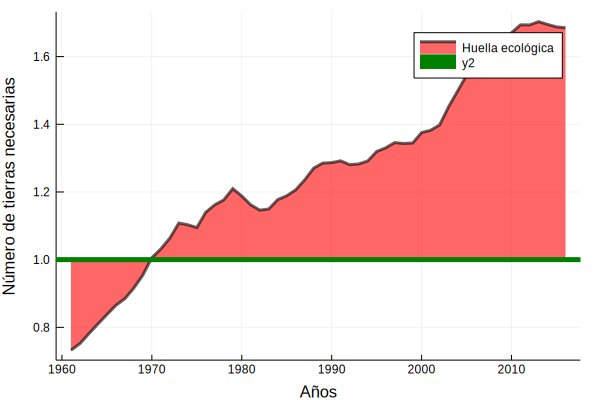

In [22]:
plot(tiempo,totales,fill=(1,:red), c=:black,lw=3,α=0.6,ylabel="Número de tierras necesarias",xlabel="Años",lab="Huella ecológica")
hline!([1],fill=(1,:green),c=:green,linewidth=5,α=1)

In [2]:
f=open("../../Country_Trends_World_pp.csv")
crudos=readlines(f)
tiempo =[]
totales =[]

for i in 2:length(crudos)
    t=split(crudos[i],",")[3]
    push!(tiempo,parse(Int64,t))
    tot=split(crudos[i],",")[11]
    push!(totales,parse(Float64,tot))
end

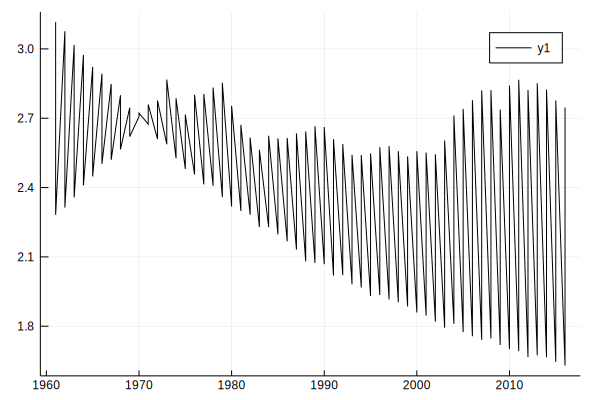

In [3]:
plot(tiempo,totales, c=:black,lw=1)

Esta gráfica es muy rara. Debemos ver los datos con cuidado. En la segunda columna de "year" podemos ver que los años se repiten y en la columan "Record" podemos ver dos etiquetas: "BioCapPerCap" y "EFConsPerCap".

Es por eso que debemos dividir en dos nuestros arreglos.

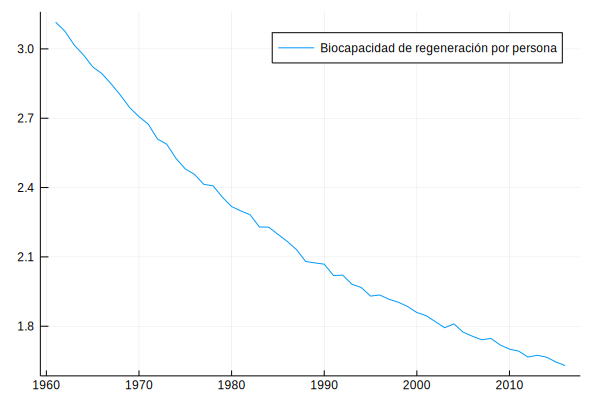

In [11]:
plot(tiempo[1:2:end],totales[1:2:end],lab="Biocapacidad de regeneración por persona")

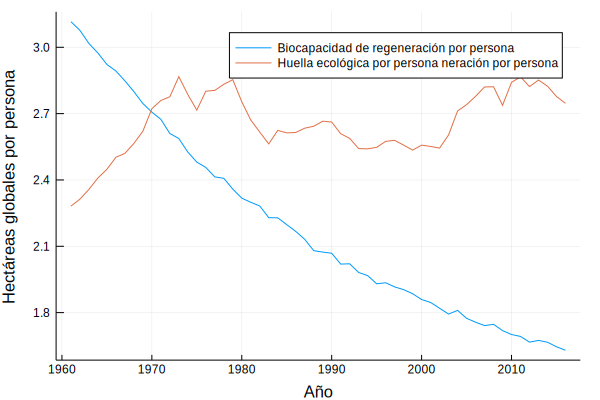

In [12]:
plot!(tiempo[2:2:end],totales[2:2:end],lab="Huella ecológica por persona regeneración por persona",xlabel="Año",ylabel="Hectáreas globales por persona")

## Ejercicio
* ¿Cuál es el papel de México en estos años? Haz dos gráficas en las que se muestre la evolución de la huella ecológica en persona y en número de tierras.
* Grafica la evolución temporal de huella ecológica por persona para cada uno de los recursos en México.

Aquí podrás descargar los datos de México: en hectáreas globales por [persona](https://github.com/mvillasante/Programacion_I/blob/master/Notas/Mexico_gha_per_person.csv) y número de [tierras](https://github.com/mvillasante/Programacion_I/blob/master/Notas/Mexico_numeros_tierras.csv) 

In [1]:
pwd()

"/home/mvb/Documentos/UABJO/Programacion/Programacion_I/Notas"

In [2]:
f = open("Mexico_numeros_tierras.csv")
crudos = readlines(f)

57-element Array{String,1}:
 "Country Name,Short Name,year,Record,Built-up Land,Carbon,Cropland,Fishing Grounds,Forest Products,Grazing Land,Total,Data Quality Score,isoa2"                               
 "Mexico,Mexico,1961,Earths,0.006908271212901995,0.14646830533517388,0.11864868718201825,0.0053524036820543535,0.09395637935455024,0.22197911120544728,0.593313157972145,3A,MX"
 "Mexico,Mexico,1962,Earths,0.007180455420221026,0.1416507407662082,0.11535818588716153,0.005817062024535673,0.09685873651200408,0.21298796984986385,0.5798531504599942,3A,MX" 
 "Mexico,Mexico,1963,Earths,0.007844254471212569,0.15200739285623135,0.12622320006038343,0.00682723909069282,0.09883404039319231,0.2138430065164504,0.6055791333881619,3A,MX"  
 "Mexico,Mexico,1964,Earths,0.009459624381233621,0.1714497190396382,0.14174119730412316,0.006951473449780245,0.09984690907463278,0.2197994916648407,0.6492484149142475,3A,MX"  
 "Mexico,Mexico,1965,Earths,0.009950154551787245,0.1741085823262507,0.13692441783458542,0.00

In [3]:
crudos[1]

"Country Name,Short Name,year,Record,Built-up Land,Carbon,Cropland,Fishing Grounds,Forest Products,Grazing Land,Total,Data Quality Score,isoa2"

In [5]:
split(crudos[1],",")

13-element Array{SubString{String},1}:
 "Country Name"      
 "Short Name"        
 "year"              
 "Record"            
 "Built-up Land"     
 "Carbon"            
 "Cropland"          
 "Fishing Grounds"   
 "Forest Products"   
 "Grazing Land"      
 "Total"             
 "Data Quality Score"
 "isoa2"             

In [6]:
año = split(crudos[1],",")[3]

"year"

In [9]:
tot = split(crudos[2],",")[11]

"0.593313157972145"

In [11]:
parse(Float64,tot)

0.593313157972145

In [13]:
tiempo = Int32[]
totales = Float64[]

for i in 2:length(crudos) #57
    año = split(crudos[i],",")[3]
    tot = split(crudos[i],",")[11]
    push!(tiempo,parse(Int32,año))
    push!(totales,parse(Float64,tot))
end
tiempo

56-element Array{Int32,1}:
 1961
 1962
 1963
 1964
 1965
 1966
 1967
 1968
 1969
 1970
 1971
 1972
 1973
    ⋮
 2005
 2006
 2007
 2008
 2009
 2010
 2011
 2012
 2013
 2014
 2015
 2016

In [15]:
using Plots
gr()

Plots.GRBackend()

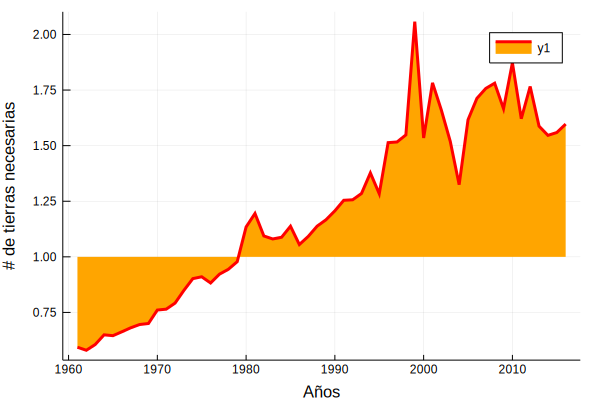

In [18]:
plot(tiempo,totales,c=:red,fill=(1,:orange),lw=3,xlabel="Años",ylabel="# de tierras necesarias")

## Recurso de méxico


In [19]:
crudos

57-element Array{String,1}:
 "Country Name,Short Name,year,Record,Built-up Land,Carbon,Cropland,Fishing Grounds,Forest Products,Grazing Land,Total,Data Quality Score,isoa2"                               
 "Mexico,Mexico,1961,Earths,0.006908271212901995,0.14646830533517388,0.11864868718201825,0.0053524036820543535,0.09395637935455024,0.22197911120544728,0.593313157972145,3A,MX"
 "Mexico,Mexico,1962,Earths,0.007180455420221026,0.1416507407662082,0.11535818588716153,0.005817062024535673,0.09685873651200408,0.21298796984986385,0.5798531504599942,3A,MX" 
 "Mexico,Mexico,1963,Earths,0.007844254471212569,0.15200739285623135,0.12622320006038343,0.00682723909069282,0.09883404039319231,0.2138430065164504,0.6055791333881619,3A,MX"  
 "Mexico,Mexico,1964,Earths,0.009459624381233621,0.1714497190396382,0.14174119730412316,0.006951473449780245,0.09984690907463278,0.2197994916648407,0.6492484149142475,3A,MX"  
 "Mexico,Mexico,1965,Earths,0.009950154551787245,0.1741085823262507,0.13692441783458542,0.00

In [24]:
ejemplo = Array{Float64}(undef,3,4)

3×4 Array{Float64,2}:
 0.0           4.94066e-324  6.9418e-310  6.9418e-310
 0.0           0.0           6.9418e-310  6.9418e-310
 9.88131e-324  6.9418e-310   6.9418e-310  6.9418e-310

In [25]:
ejemplo[1,1]=1
ejemplo

3×4 Array{Float64,2}:
 1.0           4.94066e-324  6.9418e-310  6.9418e-310
 0.0           0.0           6.9418e-310  6.9418e-310
 9.88131e-324  6.9418e-310   6.9418e-310  6.9418e-310

In [27]:
ejemplo[3,3]= 1
ejemplo

3×4 Array{Float64,2}:
 1.0           4.94066e-324  6.9418e-310  6.9418e-310
 0.0           0.0           6.9418e-310  6.9418e-310
 9.88131e-324  6.9418e-310   1.0          6.9418e-310

In [34]:
push!(ejemplo[2,:],100)

5-element Array{Float64,1}:
   0.0                  
   0.0                  
   6.94179957949614e-310
   6.94179957952776e-310
 100.0                  

In [38]:
ejemplo_mod = push!(ejemplo[2,:],100)

5-element Array{Float64,1}:
   0.0                  
   0.0                  
   6.94179957949614e-310
   6.94179957952776e-310
 100.0                  

In [20]:
split(crudos[1],",")[5:10]

6-element Array{SubString{String},1}:
 "Built-up Land"  
 "Carbon"         
 "Cropland"       
 "Fishing Grounds"
 "Forest Products"
 "Grazing Land"   

In [23]:
totales = Array{Float64}(undef,6,length(crudos)-1)

6×56 Array{Float64,2}:
 6.9418e-310  6.9418e-310  6.9418e-310  …  6.9418e-310  6.9418e-310
 6.9418e-310  6.9418e-310  6.9418e-310     6.9418e-310  6.9418e-310
 6.9418e-310  6.9418e-310  6.9418e-310     6.9418e-310  6.9418e-310
 6.9418e-310  6.9418e-310  6.9418e-310     6.9418e-310  6.9418e-310
 6.9418e-310  6.9418e-310  6.9418e-310     6.9418e-310  6.9418e-310
 6.9418e-310  6.9418e-310  6.9418e-310  …  6.9418e-310  6.9418e-310

In [39]:
totales = Array{Float64}(undef,6,length(crudos)-1)
for j in 5:10
    for i in 2:length(crudos)
        tot = split(crudos[i],",")[j]
        totales[j-4,i-1] = parse(Float64,tot)
    end
end

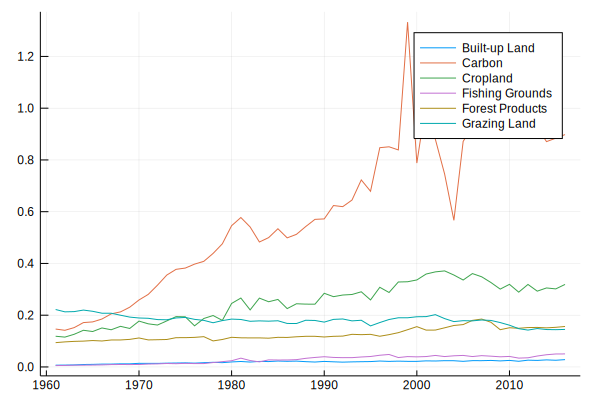

In [49]:
f = plot(tiempo,totales[1,:],label=split(crudos[1],",")[5])
for i in 2:6
    plot!(tiempo,totales[i,:],label=split(crudos[1],",")[i+4])
end
display(f)